
# Investigating a Dataset of medical appointment records in Brazil in relation to the question of whether patients show up or not for their appointment.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This project is an investigation of medical appointment records, it indicates whether a patient show up for an appointment or not, the dataset records information from more than 100,000 medical appointments in Brazil which include ScheduleDay, Neighboorhood, gender, age, AppointmentDay, and the kind of ailment each patient has that may prevent showing up for an appointment. The ailment are categorized into Hypertension, Diabetes, Alcoholism and Handicap. This dataset also include weather SMS was received or not and weather they are enrolled in brasilian welfare program Bolsa Familia, which has been mentioned as one factor contributing to the reduction of poverty in Brazil, The Economist described Bolsa Família as an anti-poverty scheme invented in Latin America that is winning converts worldwide. 
 
> This study aims at providing many answers to questions including, but not limited to,  
    
>   -  The gender with the most missed appointment.
>   -  Whether a particular neighboorhood is notorious for not adhering or non-challant to medical appointment.
>   -  The mean age of those who missed appointments.
>   -  Whether lack of scholarship 'Bolsa Familia'is a factor influencing decision of patient to meet up with an appointment.
>   -  Whether a reminder in form of SMS influences a decision to keep to an appointment.
>   -  The ailment that may hinder a patient from attending a medical appointment.
>   -  The number of patients that did not show up for medical appointment.
>   -  The number of male and female that did not show up for medical appointment.
>   -  The number of patients that received an SMS.
>   -  The number of male and female that received an SMS.
>   -  The mean age of those who received an SMS.    
        
     

In [1]:
# importing the libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
%config Inline.backend.figure_format = 'retina'
sns.set_palette('Set2')

<a id='wrangling'></a>
## Data Wrangling

> ### Gathering


In [2]:
# loading the dataset to dataframe
df = pd.read_csv('nosh.csv')

> ### Assessing

In [3]:
# checking the dataset visually.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# checking more info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# shape of the dataframe
df_shape = df.shape
print('The shape of the dataframe is {}'.format(df_shape))

The shape of the dataframe is (110527, 14)


In [6]:
# value counts of the gender column
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [7]:
# value counts of the age column
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [8]:
# checking the lowest to the highest age
df.Age.sort_values()

99832      -1
34218       0
102834      0
102832      0
102830      0
         ... 
63915     115
76284     115
68127     115
63912     115
97666     115
Name: Age, Length: 110527, dtype: int64

In [9]:
# value counts of the scholarship column
df.Scholarship.value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [10]:
# value counts of the SMS_received column
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [11]:
# value counts of the No-show column
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [12]:
# value counts of the Neighbourhood column
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [13]:
# value counts of the PatientId column
df['PatientId'].value_counts()

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
7.579746e+13    62
                ..
1.779297e+13     1
9.985120e+11     1
3.256827e+13     1
9.232297e+13     1
5.133834e+14     1
Name: PatientId, Length: 62299, dtype: int64

In [14]:
# value counts of the AppointmentID column
df['AppointmentID'].value_counts()

5771266    1
5680512    1
5602682    1
5598584    1
5584243    1
          ..
5686642    1
5692785    1
5647727    1
5645678    1
5769215    1
Name: AppointmentID, Length: 110527, dtype: int64

#### Messy (structural) issues and Dirty (quality) issues
- Gender column data type to be converted from string to categorical
- No-show column data type to be converted from string to categorical
- ScheduleDay and AppointmentDay column data type to be converted from object to datetime.
- No-show to be labelled to No_show.
- There are no null values in the dataset
- The patientId column has duplicate while the appointmentID are all unique ids, which means a 
  patient can have multiple appointments with a unique appointmentID each time of appointment.
- In the Age column we have records of age 0, -1 which are invalid  and subsequently be cleaned out.
- In the Age column we have records of age 1 which I assume cannot possibly schedule an appointment, this will be cleaned out too. 

> ### Cleaning

#### Cleaning messy and structural issues
- converting Gender column to categorical data type.
- converting No-show column to categorical data type.
- converting ScheduleDay column to datetime data type. 
- converting AppointmentDay column to datetime data type.
- changing column label No-show to No_show
- removing the records of age 0, -1 and 1

In [15]:
# making a copy to  be cleaned
df_clean = df.copy()

In [16]:
# converting gender column to categorical 
df_clean.Gender = df_clean.Gender.astype('category')


In [17]:
# testing the conversion
df_clean['Gender'].dtype


CategoricalDtype(categories=['F', 'M'], ordered=False)

In [18]:
# converting no-show column to categorical
df_clean['No-show'] = df_clean['No-show'].astype('category')

In [19]:
# testing the conversion
df_clean['No-show'].dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False)

In [20]:
# converting ScheduledDay column to Datetime
df_clean.ScheduledDay = pd.to_datetime(df_clean.ScheduledDay)

In [21]:
# testing the conversion
df_clean.ScheduledDay.dtype

datetime64[ns, UTC]

In [22]:
# converting AppointmentDay column to Datetime
df_clean.AppointmentDay = pd.to_datetime(df_clean.ScheduledDay)

In [23]:
# testing the conversion
df_clean.AppointmentDay.dtype

datetime64[ns, UTC]

In [24]:
# renaming the column No-show to No_show 
df_clean.rename(columns = {'No-show':'No_show'}, inplace = True)

In [25]:
# testing the renamed column
df_clean.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')

In [26]:
# showing records of age 0
df_clean.query('Age == 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
59,7.184428e+13,5638545,F,2016-04-29 08:08:43+00:00,2016-04-29 08:08:43+00:00,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27 10:46:12+00:00,2016-04-27 10:46:12+00:00,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25 13:28:21+00:00,2016-04-25 13:28:21+00:00,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27 10:48:50+00:00,2016-04-27 10:48:50+00:00,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29 08:53:02+00:00,2016-04-29 08:53:02+00:00,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16 12:30:58+00:00,2016-05-16 12:30:58+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06 14:22:34+00:00,2016-06-06 14:22:34+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03 15:18:44+00:00,2016-06-03 15:18:44+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03 08:56:51+00:00,2016-06-03 08:56:51+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No


In [27]:
# showing records of age 1
df_clean.query('Age == 1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
66,9.784893e+14,5638604,M,2016-04-29 08:12:27+00:00,2016-04-29 08:12:27+00:00,1,CONQUISTA,0,0,0,0,0,0,No
88,4.448346e+12,5595358,M,2016-04-18 12:32:35+00:00,2016-04-18 12:32:35+00:00,1,JUCUTUQUARA,0,0,0,0,0,0,No
93,6.322533e+13,5639376,F,2016-04-29 09:01:10+00:00,2016-04-29 09:01:10+00:00,1,BONFIM,0,0,0,0,0,0,No
95,1.986249e+14,5640307,M,2016-04-29 10:28:54+00:00,2016-04-29 10:28:54+00:00,1,BONFIM,0,0,0,0,0,0,No
99,1.246213e+11,5641893,F,2016-04-29 14:38:28+00:00,2016-04-29 14:38:28+00:00,1,BONFIM,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110338,2.292794e+12,5603688,F,2016-04-20 07:18:18+00:00,2016-04-20 07:18:18+00:00,1,RESISTÊNCIA,0,0,0,0,0,1,No
110344,2.351982e+13,5787397,F,2016-06-08 09:52:05+00:00,2016-06-08 09:52:05+00:00,1,RESISTÊNCIA,0,0,0,0,0,0,No
110462,9.848895e+14,5769406,F,2016-06-03 08:48:00+00:00,2016-06-03 08:48:00+00:00,1,RESISTÊNCIA,0,0,0,0,0,0,No
110467,7.682333e+13,5782376,M,2016-06-07 11:06:56+00:00,2016-06-07 11:06:56+00:00,1,RESISTÊNCIA,0,0,0,0,0,0,No


In [28]:
# showing records of age -1
df_clean.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 08:58:13+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [29]:
# removing the records of age 0, 1 and -1  
df_clean = df_clean[df_clean['Age'] != 0] 
df_clean = df_clean[df_clean['Age'] != 1]
df_clean = df_clean[df_clean['Age'] != -1]

In [30]:
# Testing the removals
df_clean_shape = df_clean.shape
print('The shape before cleaning is {} and after cleaning is {}'.format(df_shape, df_clean_shape))

The shape before cleaning is (110527, 14) and after cleaning is (104714, 14)


<a id='eda'></a>
## Exploratory Data Analysis




In [31]:
# checking the statistical info
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,104714.0,1.470482e+14,2.556492e+14,3.921784e+04,4.164541e+12,3.163902e+13,9.423332e+13,9.999686e+14
AppointmentID,104714.0,5.675363e+06,7.135401e+04,5.030230e+06,5.640436e+06,5.680682e+06,5.725500e+06,5.790484e+06
Age,104714.0,3.912610e+01,2.201827e+01,2.000000e+00,2.100000e+01,3.900000e+01,5.600000e+01,1.150000e+02
Scholarship,104714.0,1.024409e-01,3.032287e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,104714.0,2.081957e-01,4.060195e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,104714.0,7.584468e-02,2.647507e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,104714.0,3.208740e-02,1.762331e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,104714.0,2.346391e-02,1.658238e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,104714.0,3.248754e-01,4.683305e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


> ### What gender has the most missed  medical appointment.

In [32]:
# getting the total number of Male that missed medical appointment
df_clean[['Gender', 'No_show']].query('Gender == "M"').query('No_show == "Yes"').value_counts()


Gender  No_show
M       Yes        7192
dtype: int64

In [33]:
# getiing the total number of Female that missed medical appointment
df_clean[['Gender', 'No_show']].query('Gender == "F"').query('No_show == "Yes"').value_counts()

Gender  No_show
F       Yes        14073
dtype: int64

In [81]:
# getting the total number of Male and female that missed medical appointment
df_clean.query('No_show == "Yes"')['Gender'].count()

21265

> From the above those patient that did not make a medical appointment **33.82%** are male while **66.18%** are female.

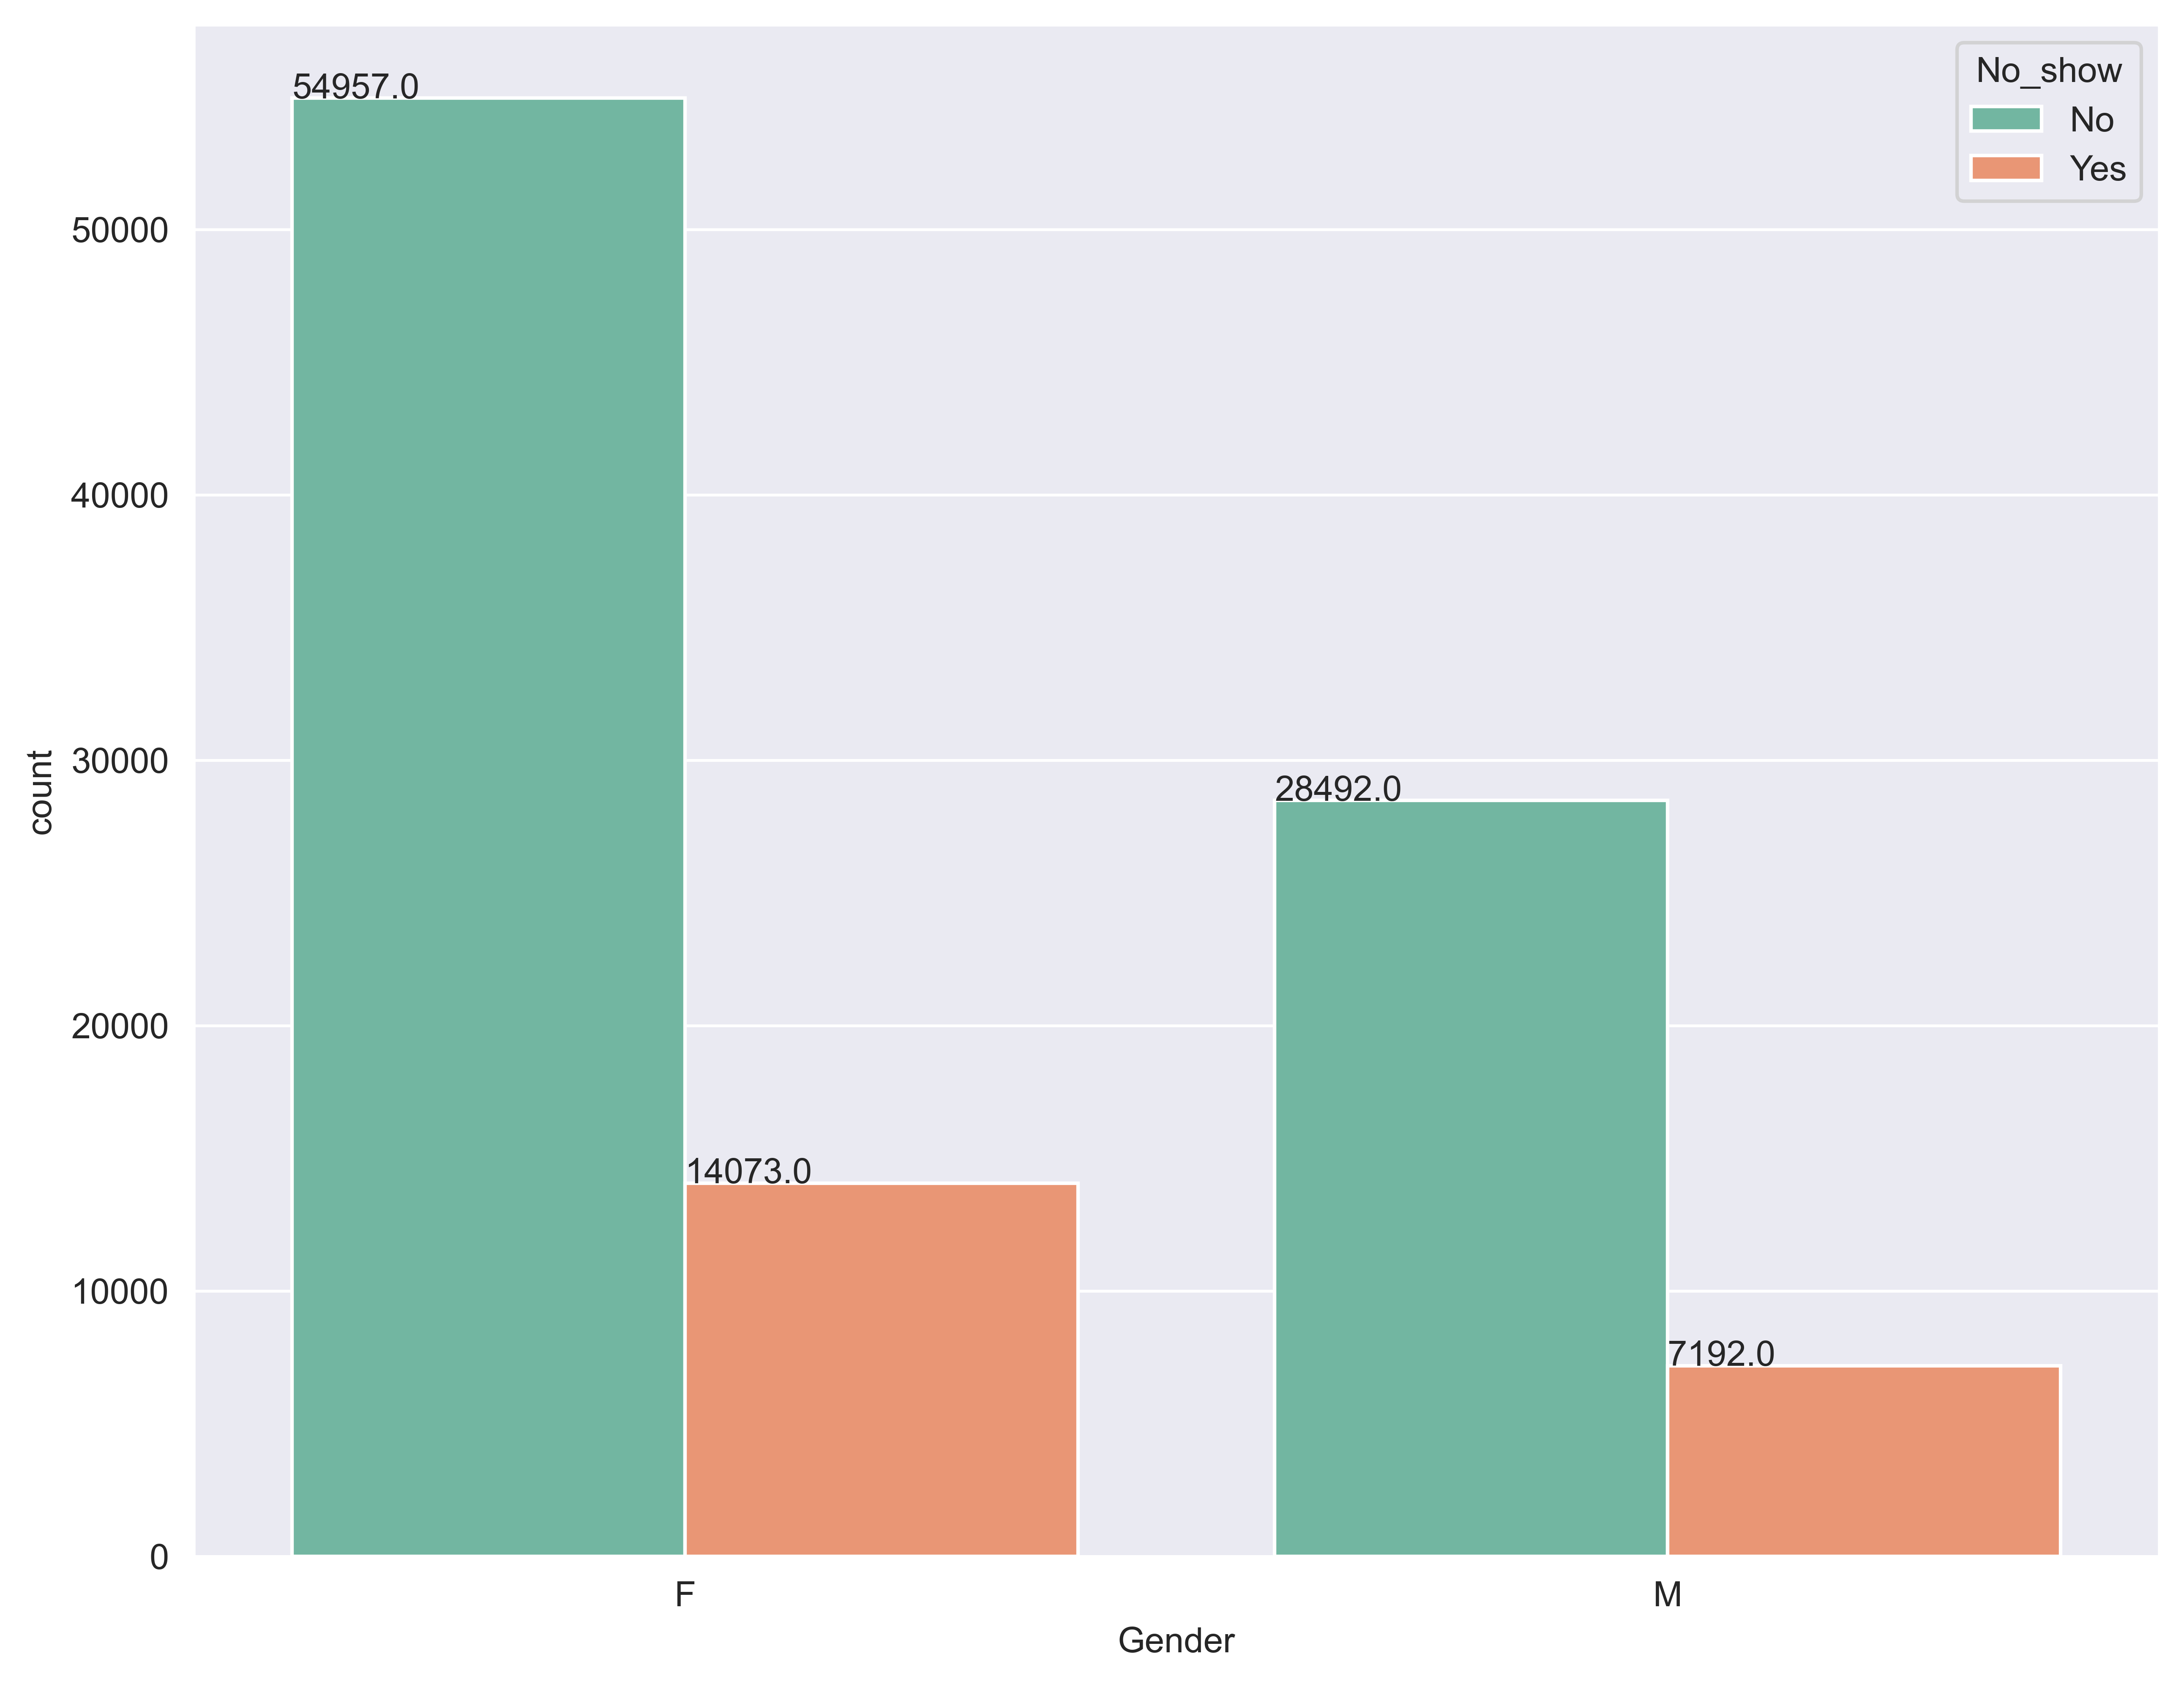

In [35]:
# plotting the value of those who show up or not in each gender
plt.figure(figsize = (10,8), dpi = 600)
ax =sns.countplot(x = 'Gender', hue = 'No_show',  data = df_clean)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0, p.get_height()+0.05))

> From the visuals above it indicates that out of **69,030** female patients, **14,073** did not show up for medical appointments which is **20.38%** of the female patients, while **7,192** male patients out of **35,684** males patients did not show up which is **20.15%** of the male patients.
It can be argued that the percentage of male patients missing or not showing up for medical appointment among the male patients is about the same as that of female patients. In this case they are both **20%**.

> ### The number of male and female that received an SMS

In [36]:
# getting the number of male and femaile that got san sms
df_clean.query('SMS_received = =1').groupby('Gender').sum()['SMS_received']

Gender
F    23490
M    10529
Name: SMS_received, dtype: int64

> From the above for those patient that received an SMS as a reminder **30.95%** are male while **69.05%** are female.

>## The number of male and female in the observation.

In [37]:
df_clean['Gender'].value_counts()

F    69030
M    35684
Name: Gender, dtype: int64

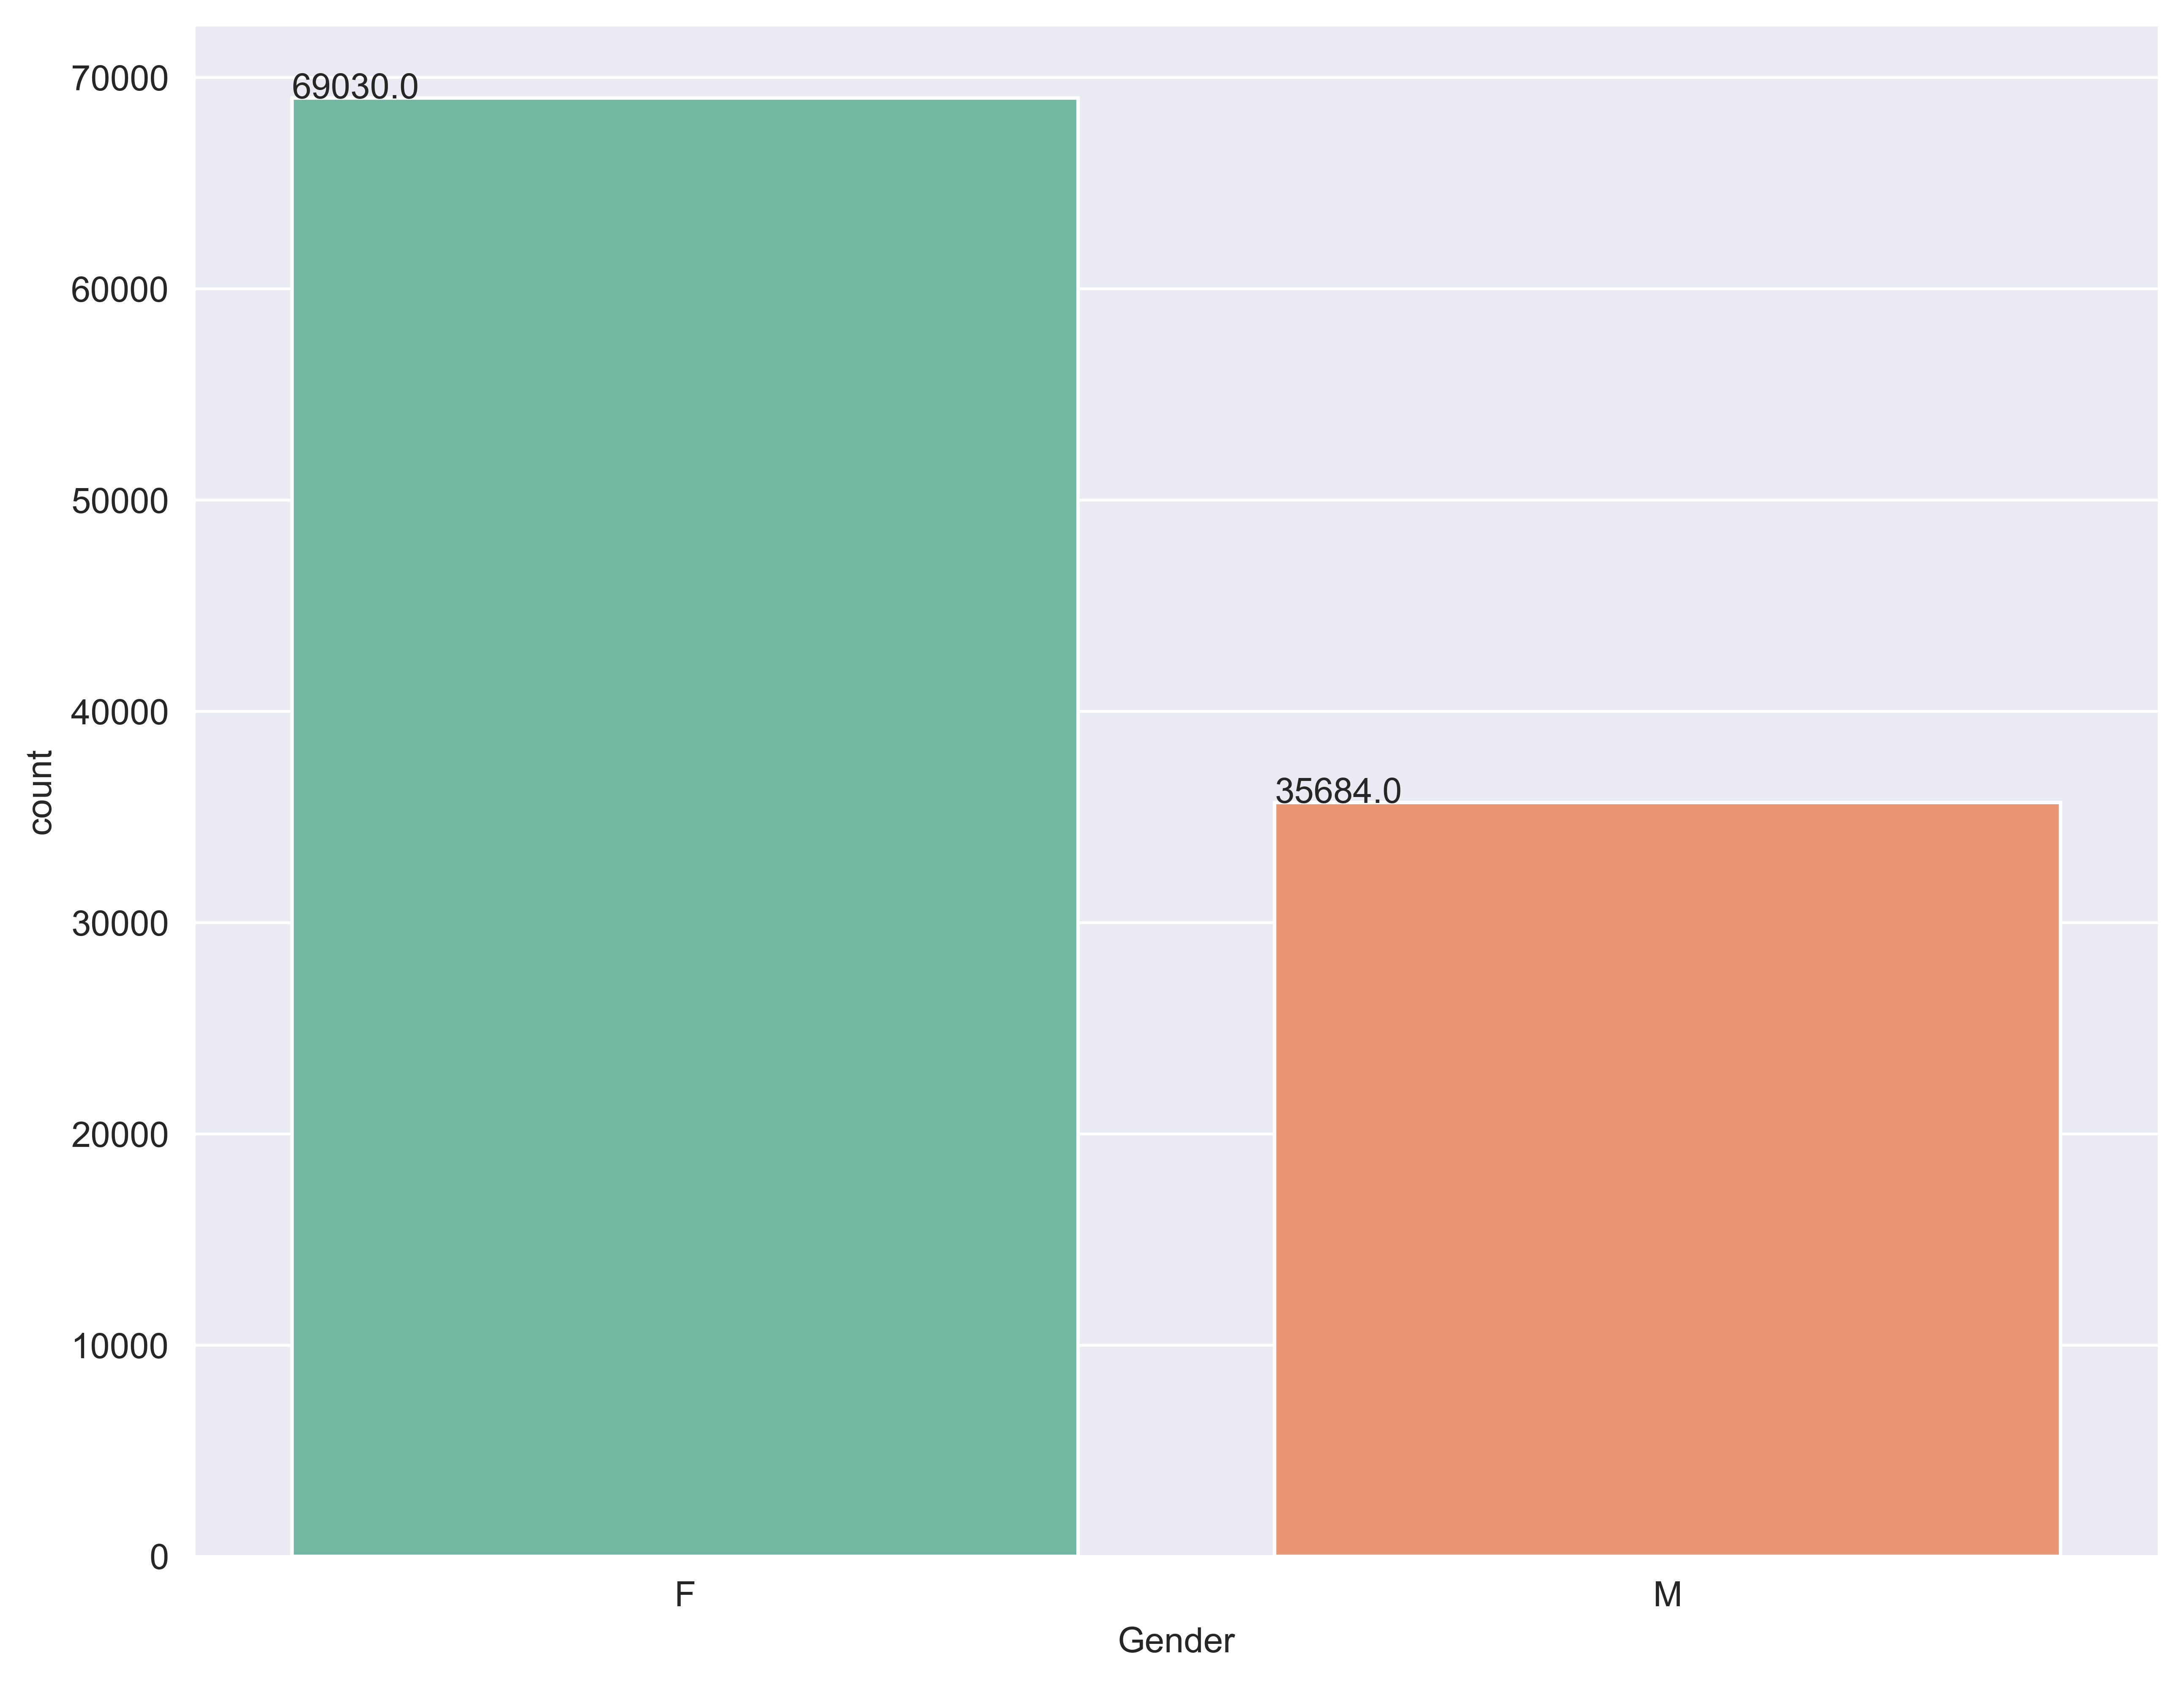

In [38]:
# plotting the value of each category of Gender
plt.figure(figsize = (10,8), dpi = 600)
ax = sns.countplot(x = 'Gender', data = df_clean)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0, p.get_height()+0.05))

The percentage of female patients in the observation stands at **65.92%** while that of male stands at **34.08%**.

> ### Whether a particular neighbourhood hospital is not getting medical appointment

In [39]:
# getting the total response of neighbourhood that did not receive medical appointment
df_clean[['Neighbourhood', 'No_show']].query('No_show == "Yes"').value_counts()


Neighbourhood                No_show
JARDIM CAMBURI               Yes        1406
MARIA ORTIZ                  Yes        1167
ITARARÉ                      Yes         887
RESISTÊNCIA                  Yes         859
CENTRO                       Yes         682
                                        ... 
PONTAL DE CAMBURI            Yes          12
ILHA DO BOI                  Yes           3
ILHAS OCEÂNICAS DE TRINDADE  Yes           2
ILHA DO FRADE                Yes           2
AEROPORTO                    Yes           1
Length: 80, dtype: int64

In [40]:
# getting the JARDIM CAMBURI neighbourhood schedeled medical appointment
df_clean.groupby('Neighbourhood').count().query('Neighbourhood == "JARDIM CAMBURI"')['No_show']

Neighbourhood
JARDIM CAMBURI    7461
Name: No_show, dtype: int64

In [41]:
# getting the MARIA ORTIZ neighbourhood schedeled medical appointment
df_clean.groupby('Neighbourhood').count().query('Neighbourhood == "MARIA ORTIZ"')['No_show']

Neighbourhood
MARIA ORTIZ    5420
Name: No_show, dtype: int64

In [42]:
# getting the ITARARÉ neighbourhood schedeled medical appointment
df_clean.groupby('Neighbourhood').count().query('Neighbourhood == "ITARARÉ"')['No_show']

Neighbourhood
ITARARÉ    3331
Name: No_show, dtype: int64

In [43]:
# getting the RESISTÊNCIA neighbourhood schedeled medical appointment
df_clean.groupby('Neighbourhood').count().query('Neighbourhood == "RESISTÊNCIA"')['No_show']

Neighbourhood
RESISTÊNCIA    4119
Name: No_show, dtype: int64

In [44]:
# getting the CENTRO neighbourhood schedeled medical appointment
df_clean.groupby('Neighbourhood').count().query('Neighbourhood == "CENTRO"')['No_show']

Neighbourhood
CENTRO    3246
Name: No_show, dtype: int64

>From all the neighbourhood that has an hospital JARDIM CAMBURI has the highest frequency in both cases of patient showing up and patient not showing up for medical appointment obviously because majority of the hospital scheduled for appointment are within the neighbourhood, to determine the neighbourhood hospitals that did not receive an appointment it would be imperative to compute the percentage of those who did not show up relative to the number of appointments scheduled for the neighbourhood hospital. 
For the scope of this study comparism will be carried out on the top five neighbourhood out of the 80 unique neighbourhood hospitals scheduled for medical appointments.
For **JARDIM CAMBURI** **18.84%** of those neighbourhood hospital that did not receive medical appointment, that of **MARIA ORTIZ, ITARARÉ, RESISTÊNCIA, CENTRO are 21.53%, 26.62%, 20.85%, 21.01%** respectively. 


>**ITARARÉ** neighbourhood hospital with **26.62%** seems to have the highest probability of not receiving a medical appointment from patient's scheduled appointments.

>### The mean age of those who missed appointments

In [45]:
# gettingthe mean age of patients who missed appointment
mean_age_missed = df_clean.query('No_show == "Yes"')['Age'].mean()
print('The mean age of those who did not show up for appointment is {}'.format(mean_age_missed))

The mean age of those who did not show up for appointment is 35.99910651304961


In [46]:
#comparing the mean age of patients that show up and patients that missed medical appointment
df_clean.groupby('No_show')['Age'].mean()

No_show
No     39.922935
Yes    35.999107
Name: Age, dtype: float64

<AxesSubplot:xlabel='No_show'>

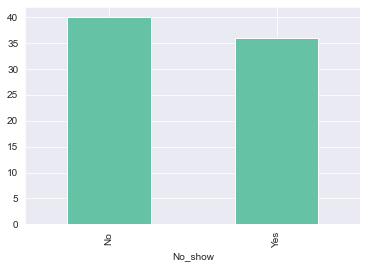

In [47]:
#comparing on a bar plot the mean age of patients that show up and patients that missed medical appointment
df_clean.groupby('No_show')['Age'].mean().plot(kind = 'bar')

>The average age of patients who missed medical appointment is greater than those who turn up for medical appointment.

In [48]:
# checking the age that missed medical appointment most
df_clean[['Age', 'No_show']].query('No_show == "Yes"').value_counts()

Age  No_show
17   Yes        396
19   Yes        394
30   Yes        369
9    Yes        364
21   Yes        355
               ... 
95   Yes          6
115  Yes          3
97   Yes          2
96   Yes          1
98   Yes          1
Length: 98, dtype: int64

>From the above patients with ages **17** missed medical appointments the most followed by age **19** and **30** in second and third ranking respectively

>### Whether lack of scholarship 'Bolsa Familia'is a factor influencing decision of patient to meet up with an appointment.

In [49]:
# getting those who had no Scholarship and who missed medical appointment
df_clean[['Scholarship', 'No_show']].query('Scholarship == 0').query('No_show =="Yes"').value_counts()

Scholarship  No_show
0            Yes        18706
dtype: int64

In [50]:
# getting those who had Scholarship and who missed medical appointment
df_clean[['Scholarship', 'No_show']].query('Scholarship == 1').query('No_show =="Yes"').value_counts()

Scholarship  No_show
1            Yes        2559
dtype: int64

In [51]:
df_clean.query('No_show == "Yes"')['No_show'].count()

21265

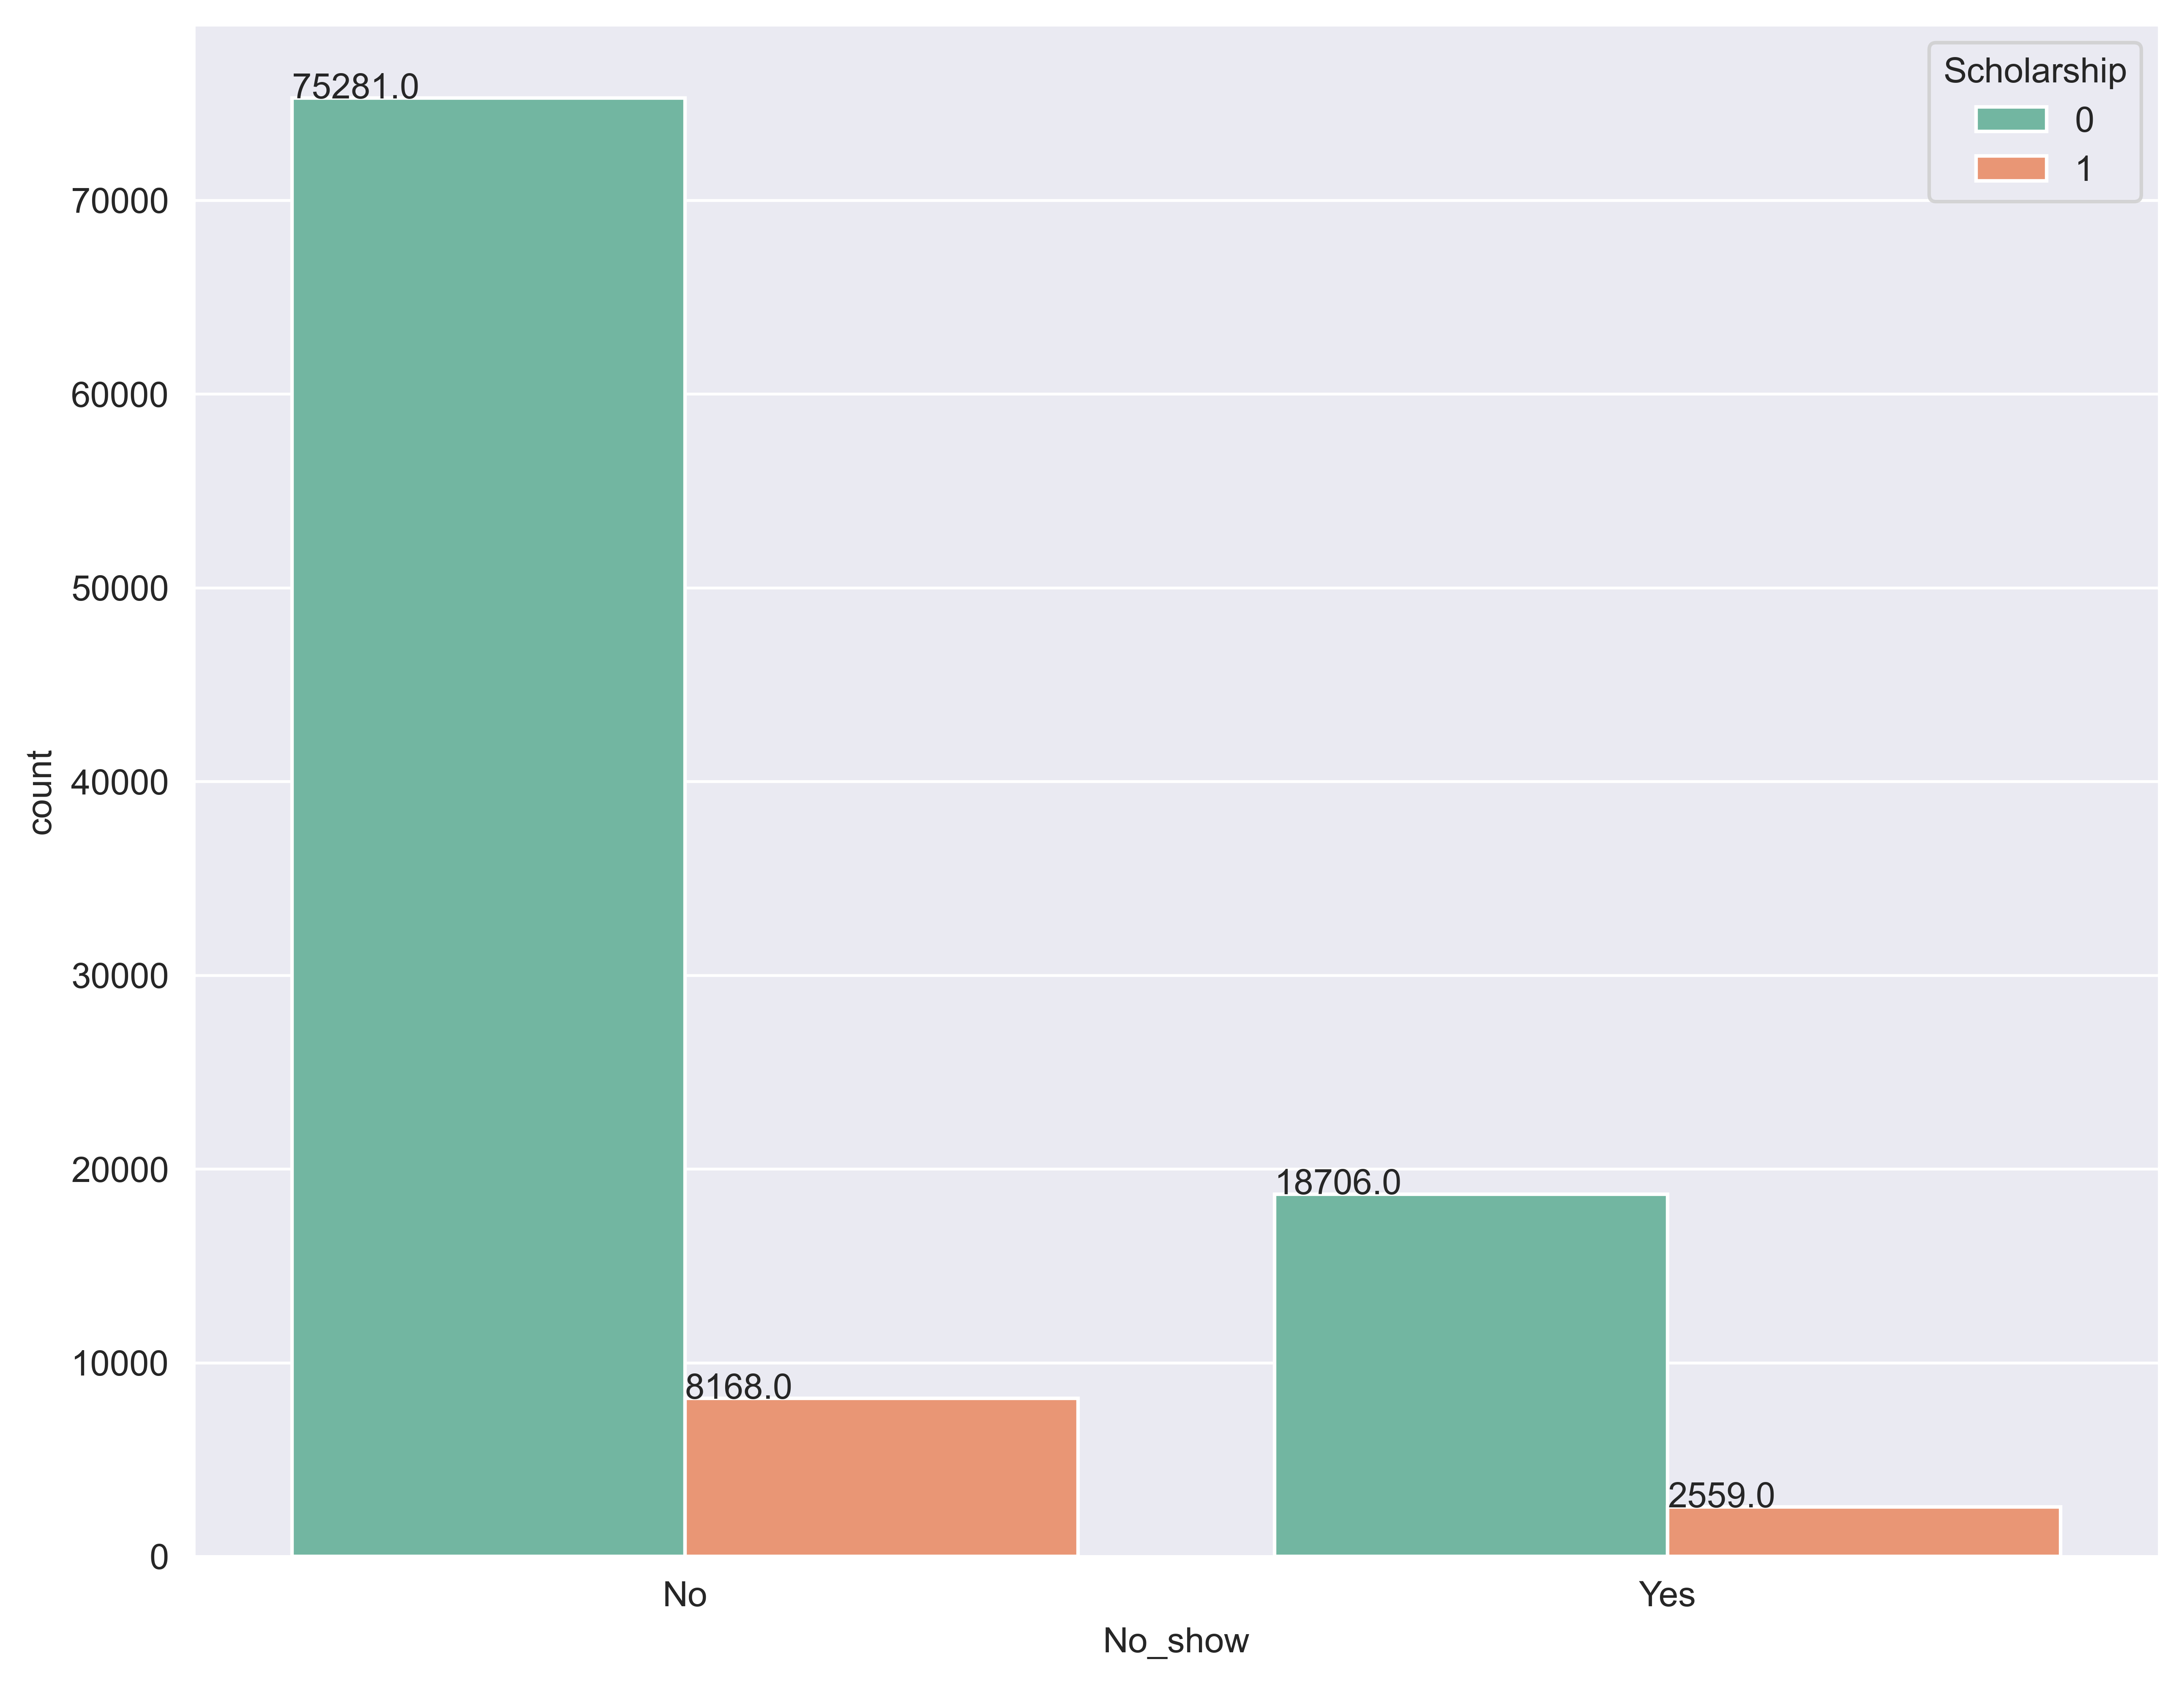

In [52]:
# plotting appointment status and patients schorlaship status.
plt.figure(figsize = (10, 8), dpi = 600)
ax = sns.countplot(x = 'No_show', data = df_clean, hue = 'Scholarship')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0, p.get_height()+0.05))

> Out of **21,264** patients who did not show up for medical appointment **18,706** patients which is **87.97%** of the who     failed appointment did not enrol in the Bolsa Familia social welfare program, this is a significant determinat as to the       decision of showing up for a medical appointment. This is a critical factor we should pay attention to.



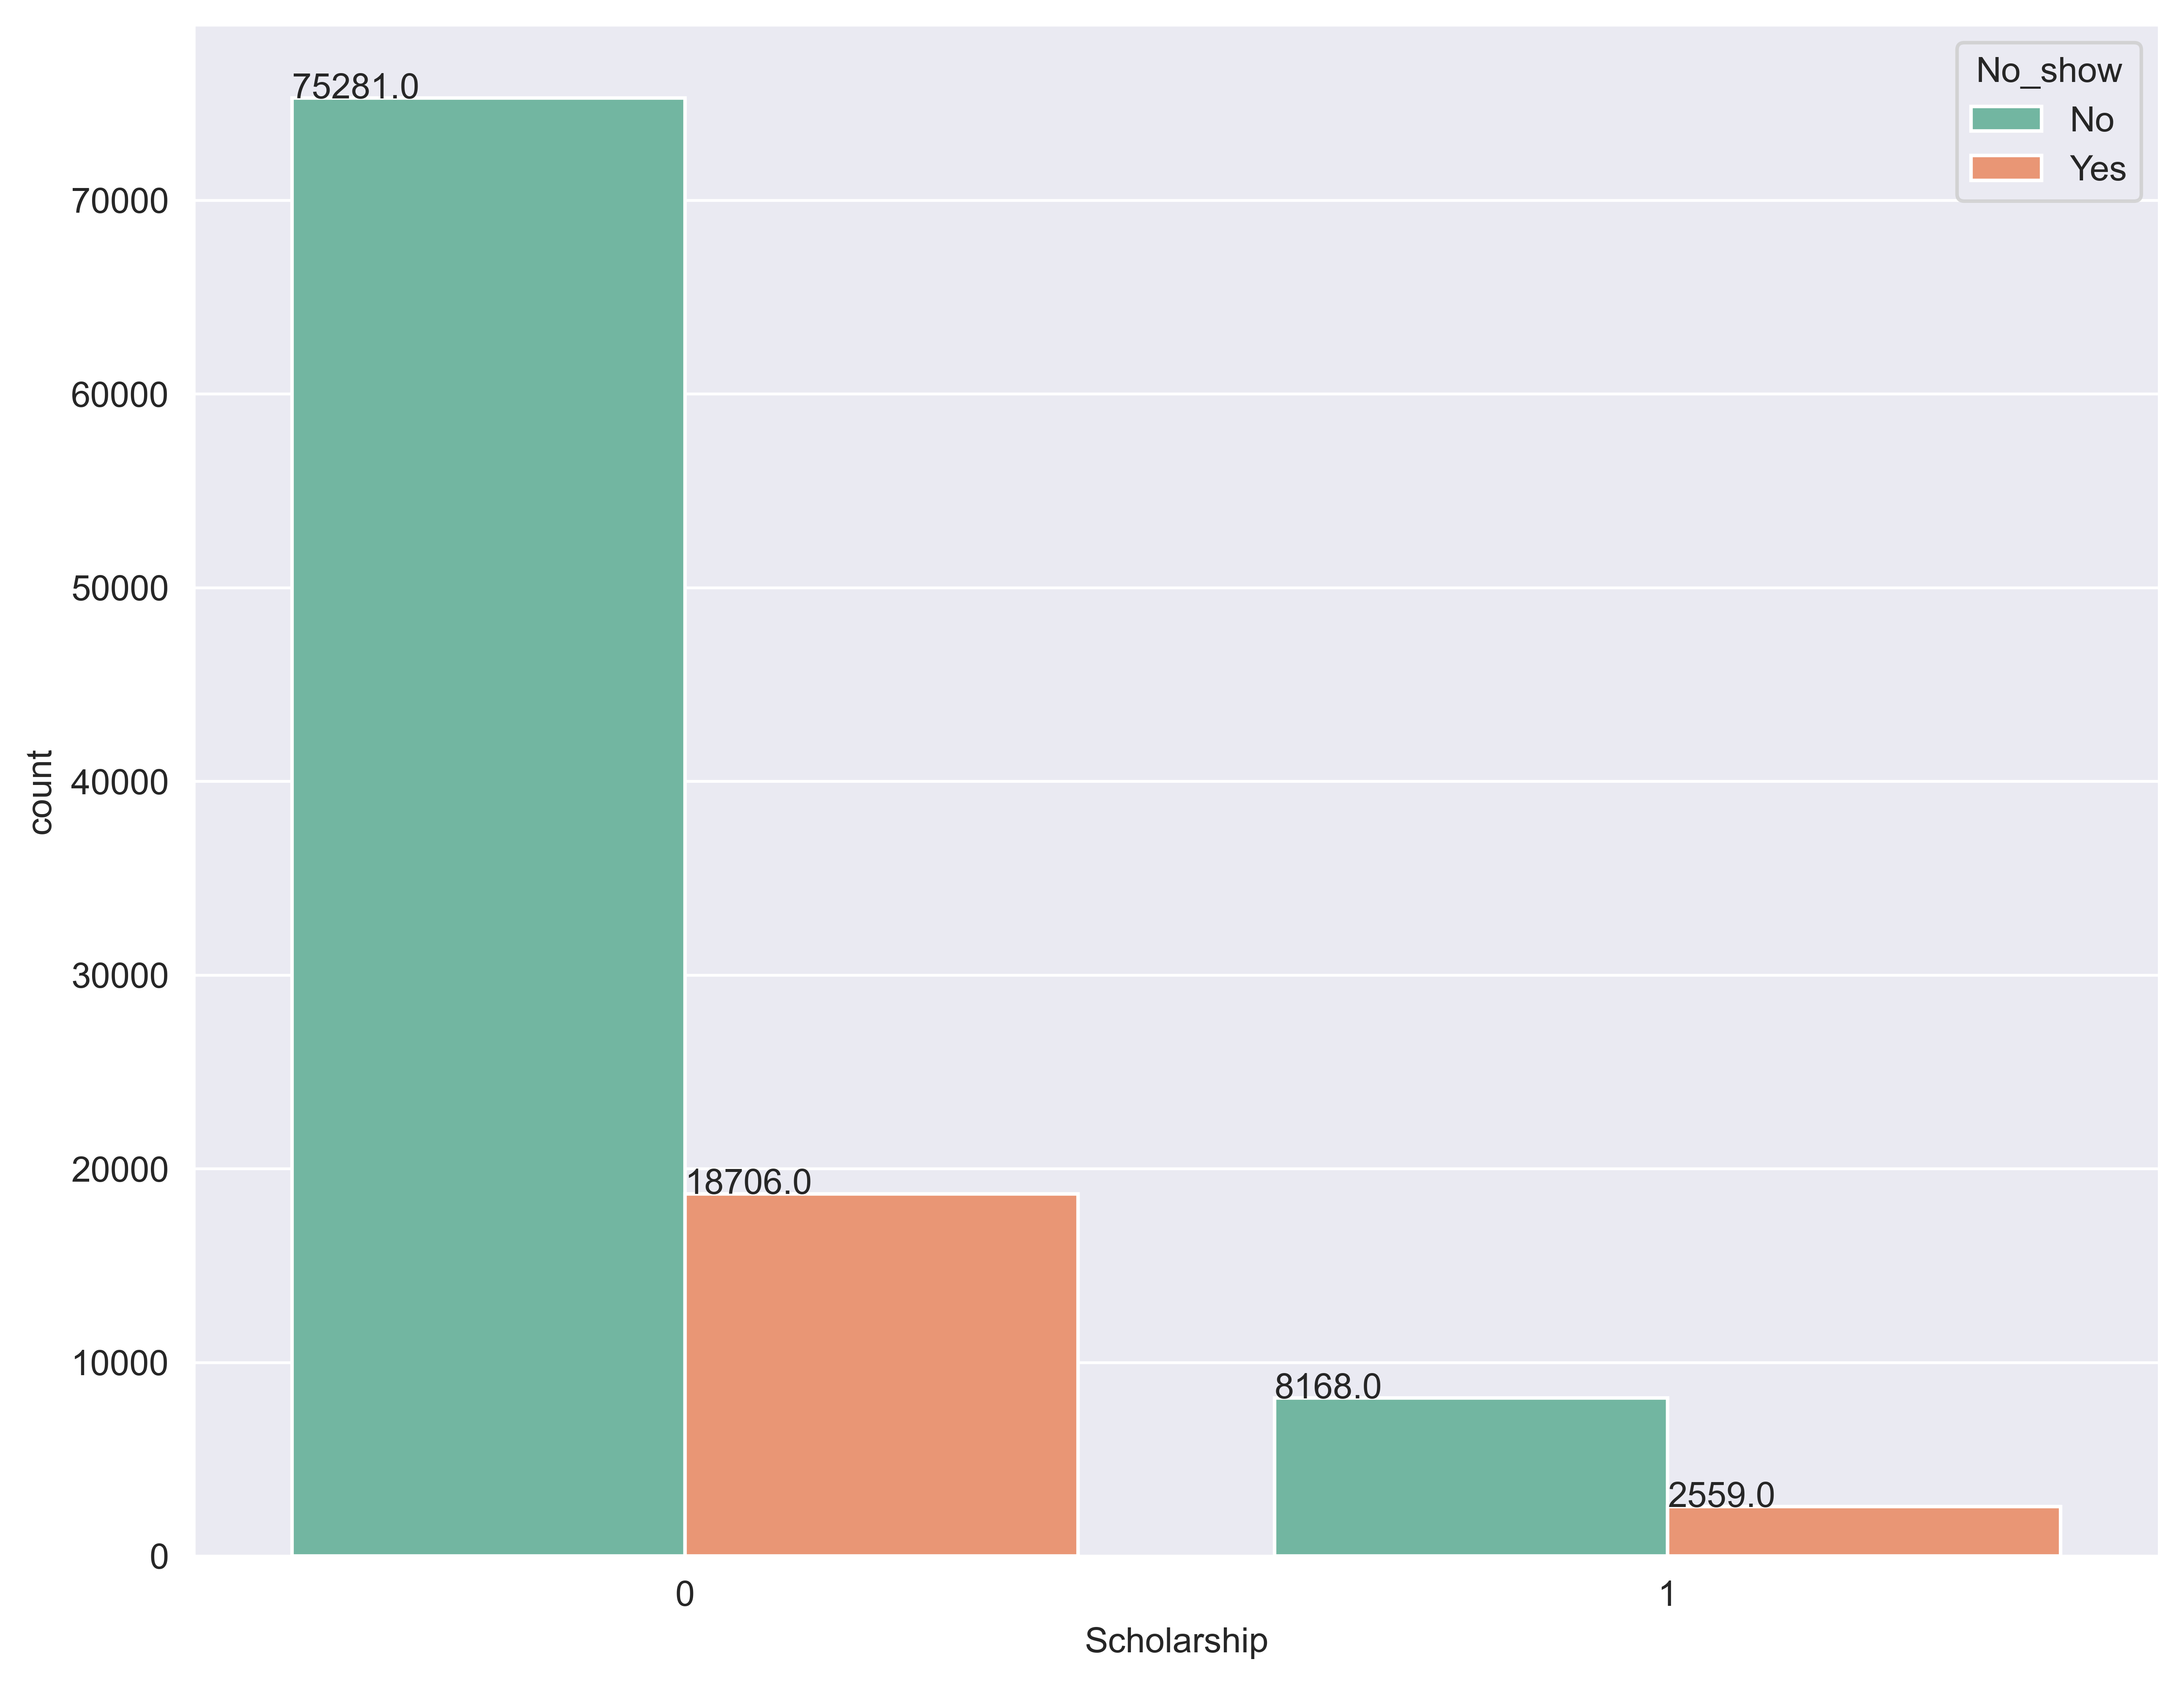

In [53]:
# plotting category of patients schorlaship and who show up or not.
plt.figure(figsize = (10, 8), dpi = 600)
ax = sns.countplot(x = 'Scholarship', data = df_clean, hue = 'No_show')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0, p.get_height()+0.05))

> Out of **10,727** who had schorlarship **2,559** did not show up for appointment which is **23.85%** of those who had scholarship, this is not really significant considering the number of patients who did not have scholarship and still turn up massively for medical appointment.

<AxesSubplot:xlabel='Scholarship', ylabel='No_show'>

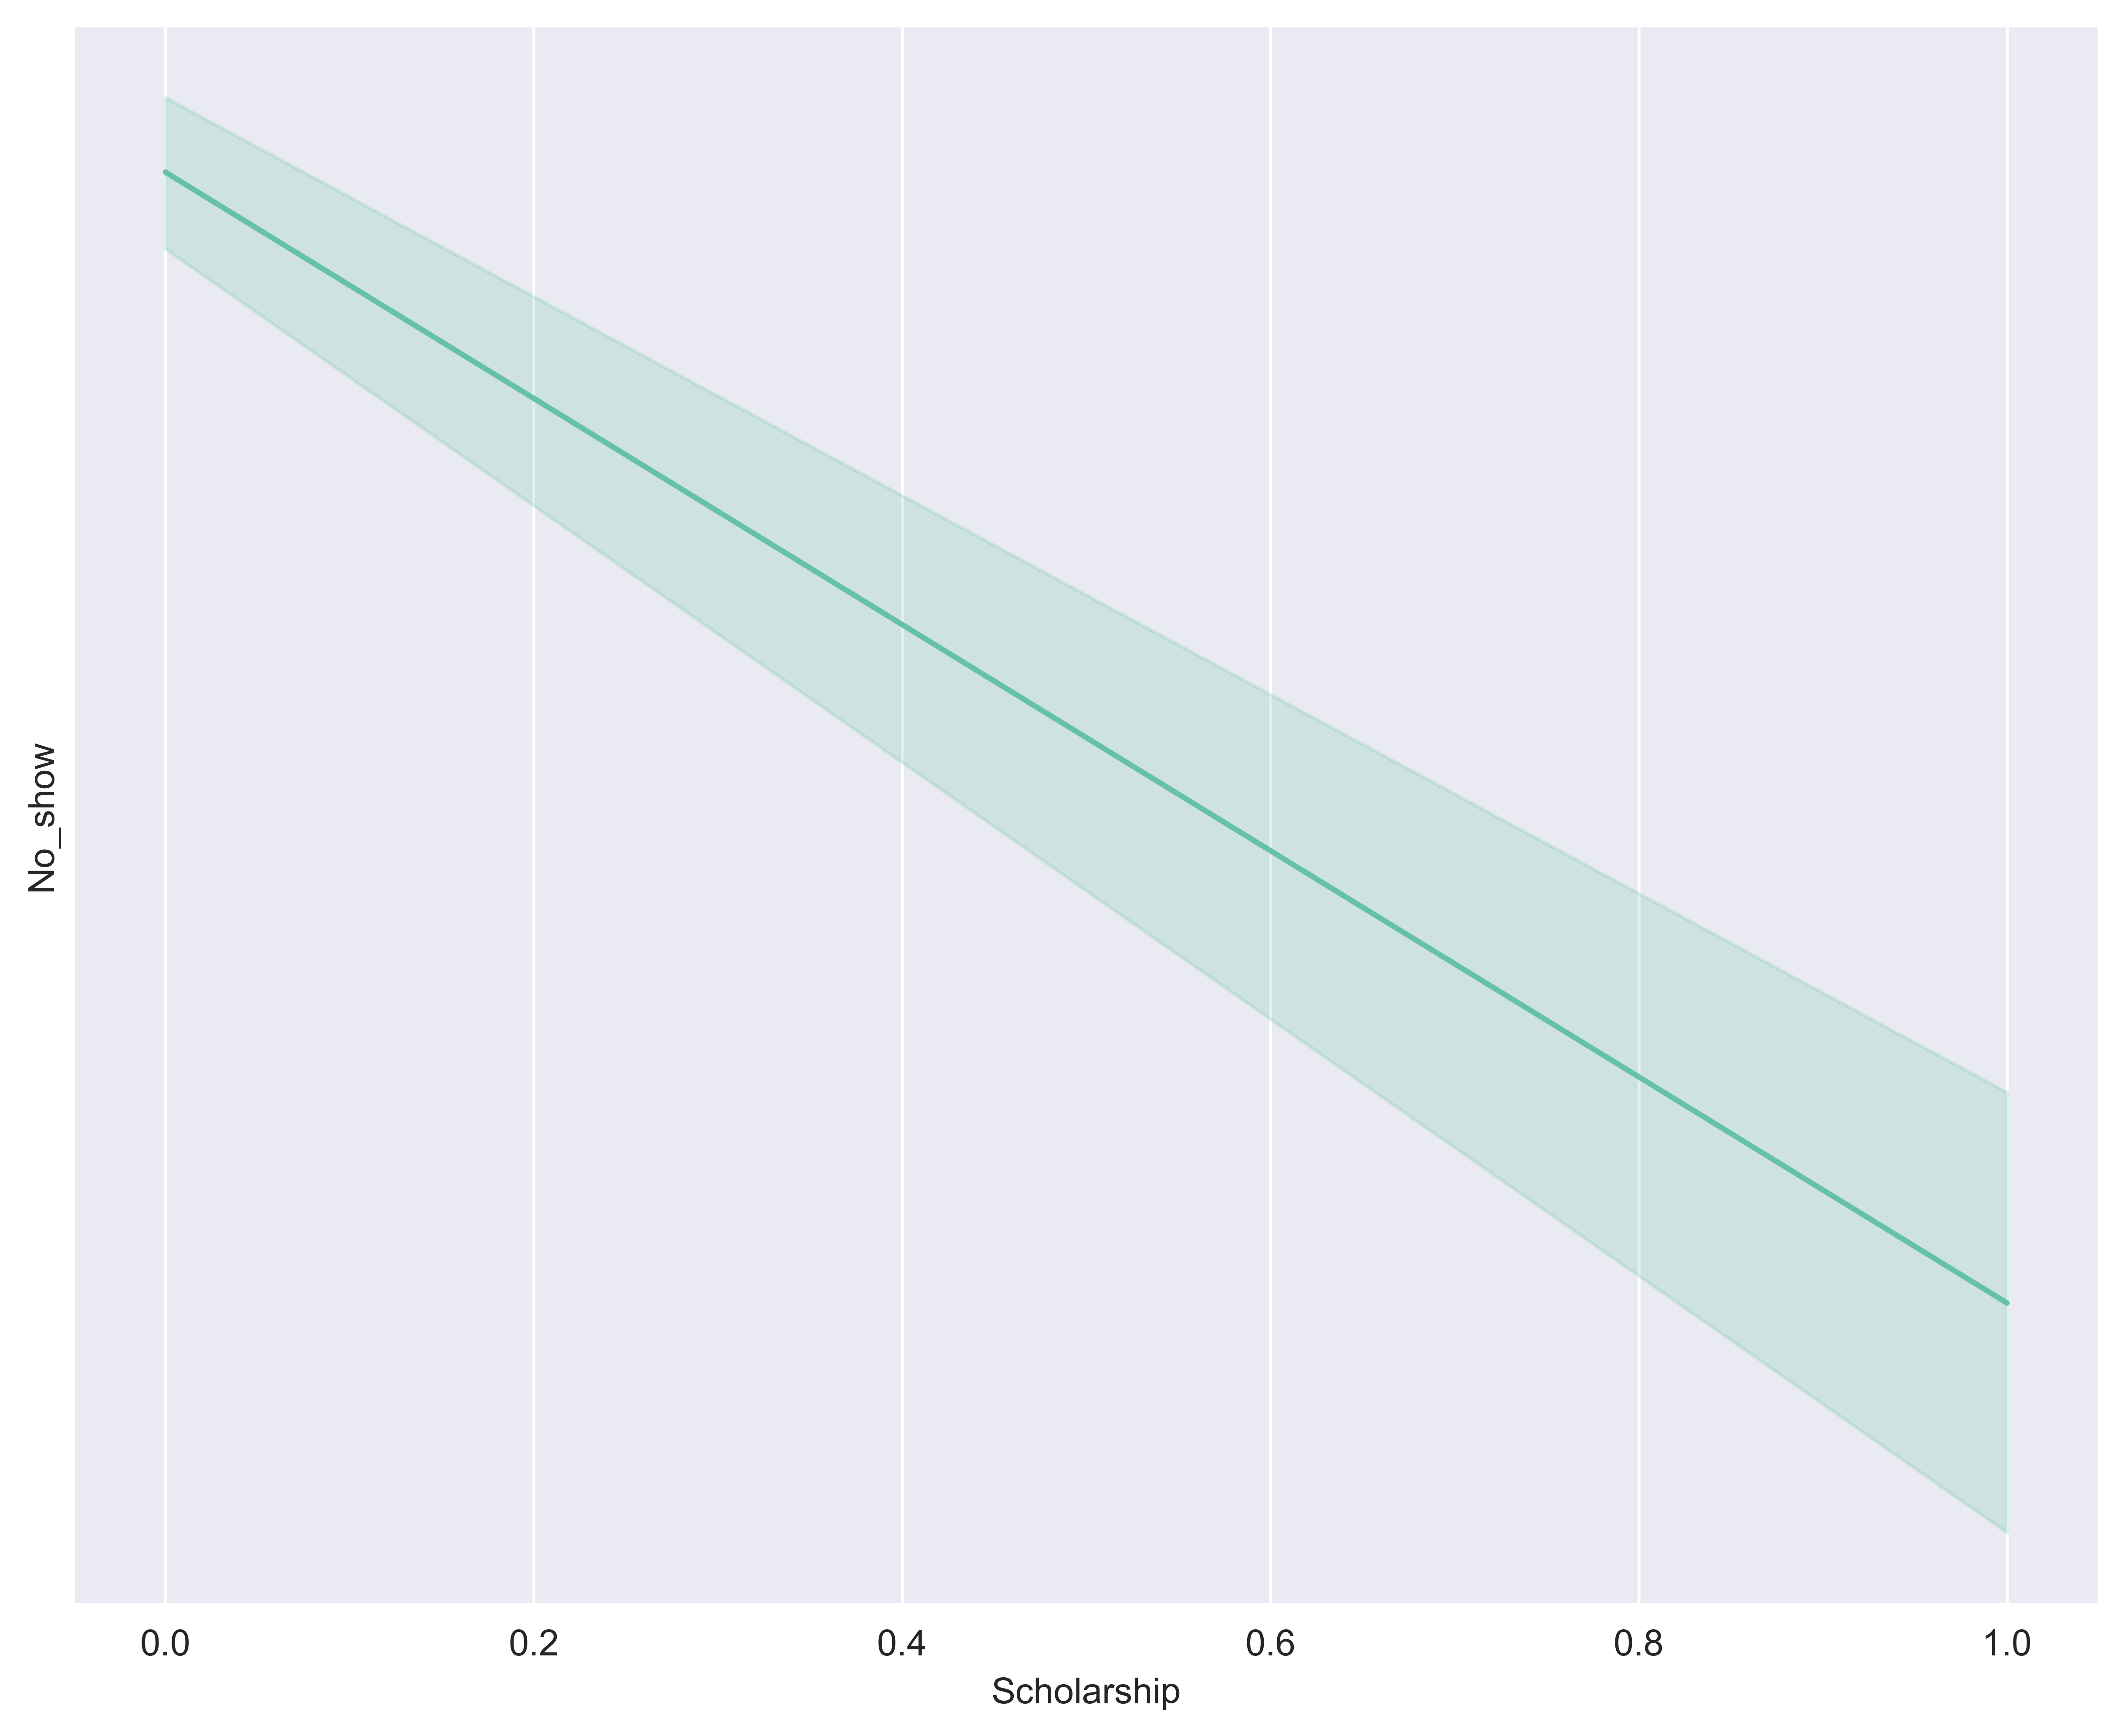

In [54]:
# plotting a line graph to indicate the relationship between Schorlarship status and No_show 
plt.figure(figsize = (10, 8), dpi = 600)
sns.lineplot(x='Scholarship', y='No_show', data= df_clean)

> This above line graph indicates a negative correlation between Scholarship and showing up for an appointment .

> ### Whether a reminder in form of SMS influences a decision to keep to an appointment.

In [55]:
# getting the number of patients who received SMS and and did not show up for appointment
df_clean[['SMS_received', 'No_show']].query('No_show == "Yes"').query('SMS_received == 1').value_counts()

SMS_received  No_show
1             Yes        9377
dtype: int64

In [56]:
# getting the number of patients who did not received SMS and and did not show up for appointment
df_clean[['SMS_received', 'No_show']].query('No_show == "Yes"').query('SMS_received == 0').value_counts()

SMS_received  No_show
0             Yes        11888
dtype: int64

In [57]:
# getting the number of patients who  did not show up for appointment regarless of SMS received or not
df_clean[['SMS_received', 'No_show']].query('No_show == "Yes"').value_counts()

SMS_received  No_show
0             Yes        11888
1             Yes         9377
dtype: int64

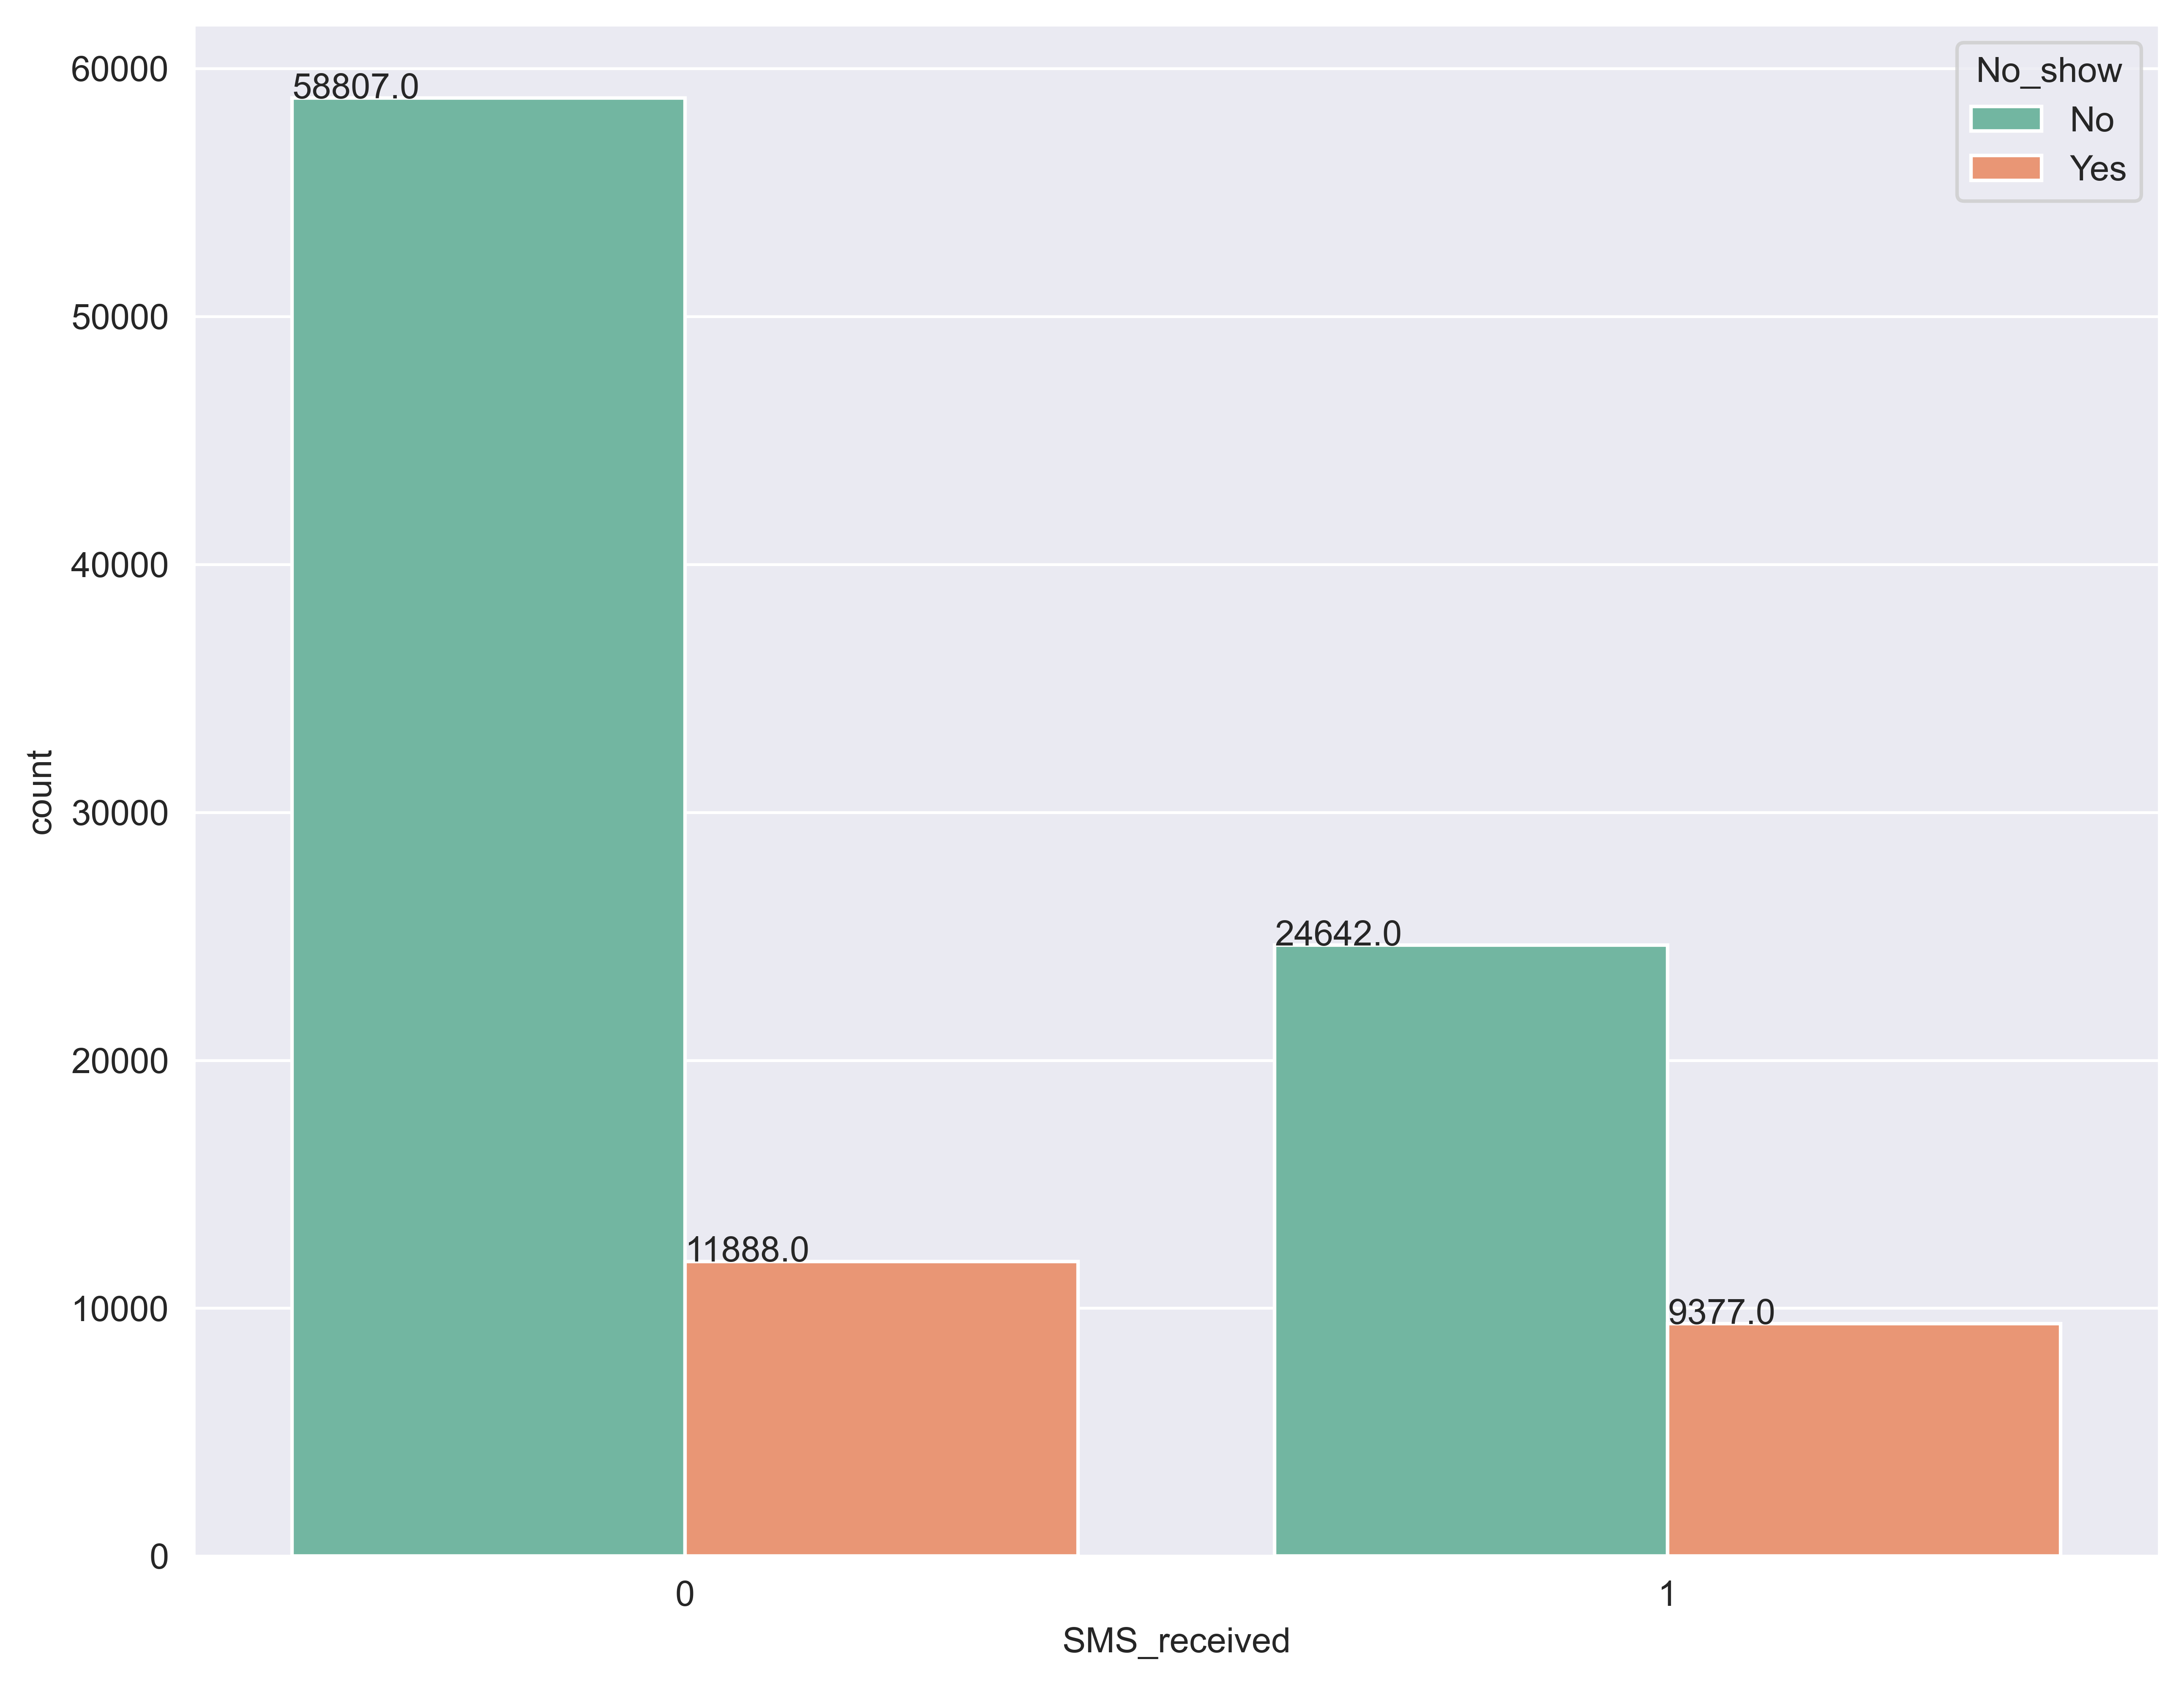

In [58]:
# plotting value of those who show up or not regarless of SMS received or not
plt.figure(figsize = (10,8), dpi = 600)
ax = sns.countplot(x = 'SMS_received', data = df_clean, hue = 'No_show')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0, p.get_height()+0.05))

>The figure above indicates that majority of the patient did not receive SMS and still turn up massively for medical appointment. **83.19%** of patients who did not received SMS show up for medical appointment in comparision to **72.44%** of patients who received SMS and turn up for medical appointment.

>A reminder in form of SMS does not have a significant impact on decision of patient to keep up to a medical appointment.

>### The ailment that may hinder a patient from attending a medical appointment.

In [59]:
# getting the patients who have hipertention and did not show up for medcal appointment
df_clean[['Hipertension', 'No_show']].query('No_show == "Yes"').query('Hipertension == 1').value_counts()

Hipertension  No_show
1             Yes        3772
dtype: int64

In [60]:
# getting the patients with or without hipertension who did not show up for medcal appointment
df_clean[['Hipertension', 'No_show']].query('No_show == "Yes"').value_counts()

Hipertension  No_show
0             Yes        17493
1             Yes         3772
dtype: int64

In [61]:
# getting the patients who have Diabetics and did not show up for medcal appointment
df_clean[['Diabetes', 'No_show']].query('No_show == "Yes"').query('Diabetes == 1').value_counts()

Diabetes  No_show
1         Yes        1429
dtype: int64

In [62]:
# getting the patients with or without hipertention who did not show up for medcal appointment
df_clean[['Diabetes', 'No_show']].query('No_show == "Yes"').value_counts()

Diabetes  No_show
0         Yes        19836
1         Yes         1429
dtype: int64

In [63]:
# getting the patients who suffer from Alcoholism and did not show up for medcal appointment
df_clean[['Alcoholism', 'No_show']].query('No_show == "Yes"').query('Alcoholism == 1').value_counts()

Alcoholism  No_show
1           Yes        677
dtype: int64

In [64]:
# getting the patients who suffer from  Alcoholism or not and did not show up for medcal appointment
df_clean[['Alcoholism', 'No_show']].query('No_show == "Yes"').value_counts()

Alcoholism  No_show
0           Yes        20588
1           Yes          677
dtype: int64

In [65]:
# getting the patients who are handcap and did not show up for medcal appointment
df_clean[['Handcap', 'No_show']].query('No_show == "Yes"').query('Handcap != 0').value_counts()

Handcap  No_show
1        Yes        366
2        Yes         37
3        Yes          3
4        Yes          1
dtype: int64

In [66]:
# getting the patients who are handcap or not and did not show up for medcal appointment
df_clean[['Handcap', 'No_show']].query('No_show == "Yes"').value_counts()

Handcap  No_show
0        Yes        20858
1        Yes          366
2        Yes           37
3        Yes            3
4        Yes            1
dtype: int64

> For those who did not show up for medical appointment **1,429** patients had diabetics which is **6.71%** of total patient that did not show up and had diabetics, for those who did not show up for medical appointment **3,772** patients had hipertension which is **17.7%** of total patient that did not show up and had hypertention, for those who did not show up for medical appointment **677** patients had alcoholism issues which is **3.18%** of total patient that did not show up and had alcoholism issues, and for those who did not show up for medical appointment **407** patients are handcap which is **1.91%** of total patient that that did not show up and are handcap.

> It can be affirmed that patients with hypertension may likely miss a medical appointment, as hipertension had the highest pecentage of patients that missed an appointment compared to other category of ailment that missed a medical appointment.  

> ###  The number of patients that did not show up for medical appointment.

In [67]:
# counting the number of patient who missed appointment
missed = df_clean.query('No_show == "Yes"')['No_show'].count()
print('The total number of patient that missed medical appointment are {}'.format(missed))

The total number of patient that missed medical appointment are 21265


>### The number of patients that received an SMS.   

In [68]:
# getting the total number of patients that got an SMS
received_sms = df_clean.query('SMS_received == 1')['SMS_received'].sum()
print('The total number of patients that received SMS are {}'.format(received_sms))

The total number of patients that received SMS are 34019


> ### The number of male and female patients that received an SMS.      

In [69]:
# getting the number of Male and Female that received an SMS
df_clean.query('SMS_received == 1')['Gender'].value_counts()

F    23490
M    10529
Name: Gender, dtype: int64

> ### The mean age of patients each SMS_received status.

In [70]:
# comparing the mean age of patients SMS_received distribution.
df_clean.groupby('SMS_received').mean()['Age']

SMS_received
0    39.133616
1    39.110468
Name: Age, dtype: float64

<AxesSubplot:xlabel='SMS_received'>

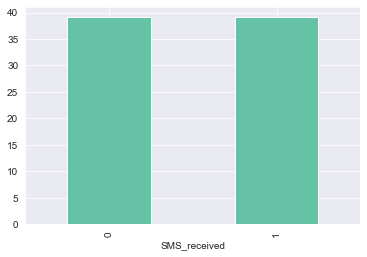

In [71]:
# comparing by bar plot the mean age of patients SMS_received distribution.
df_clean.groupby('SMS_received').mean()['Age'].plot(kind = 'bar')

In [72]:
# getting the mean age of patients that received an SMS
mean_age_received = df_clean.query('SMS_received == 1')['Age'].mean()
print ('The mean age of patients that received an SMS is {}'.format(mean_age_received))

The mean age of patients that received an SMS is 39.11046767982598


In [73]:
# getting the mean age of patients that did not received an SMS
mean_age_received = df_clean.query('SMS_received == 0')['Age'].mean()
print ('The mean age of patients that received an SMS is {}'.format(mean_age_received))

The mean age of patients that received an SMS is 39.13361623877219


In [82]:
# one-hot encoding
df_clean = pd.get_dummies(df_clean, columns = ['No_show'], drop_first =True)

In [94]:
# renaming the encoded column
df_clean.rename(columns={'No_show_Yes': 'No_show'}, inplace = True) 
df_clean.No_show.value_counts()

0    83449
1    21265
Name: No_show, dtype: int64

In [95]:
for_corr = df_clean.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1)
for_corr

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,0


<AxesSubplot:>

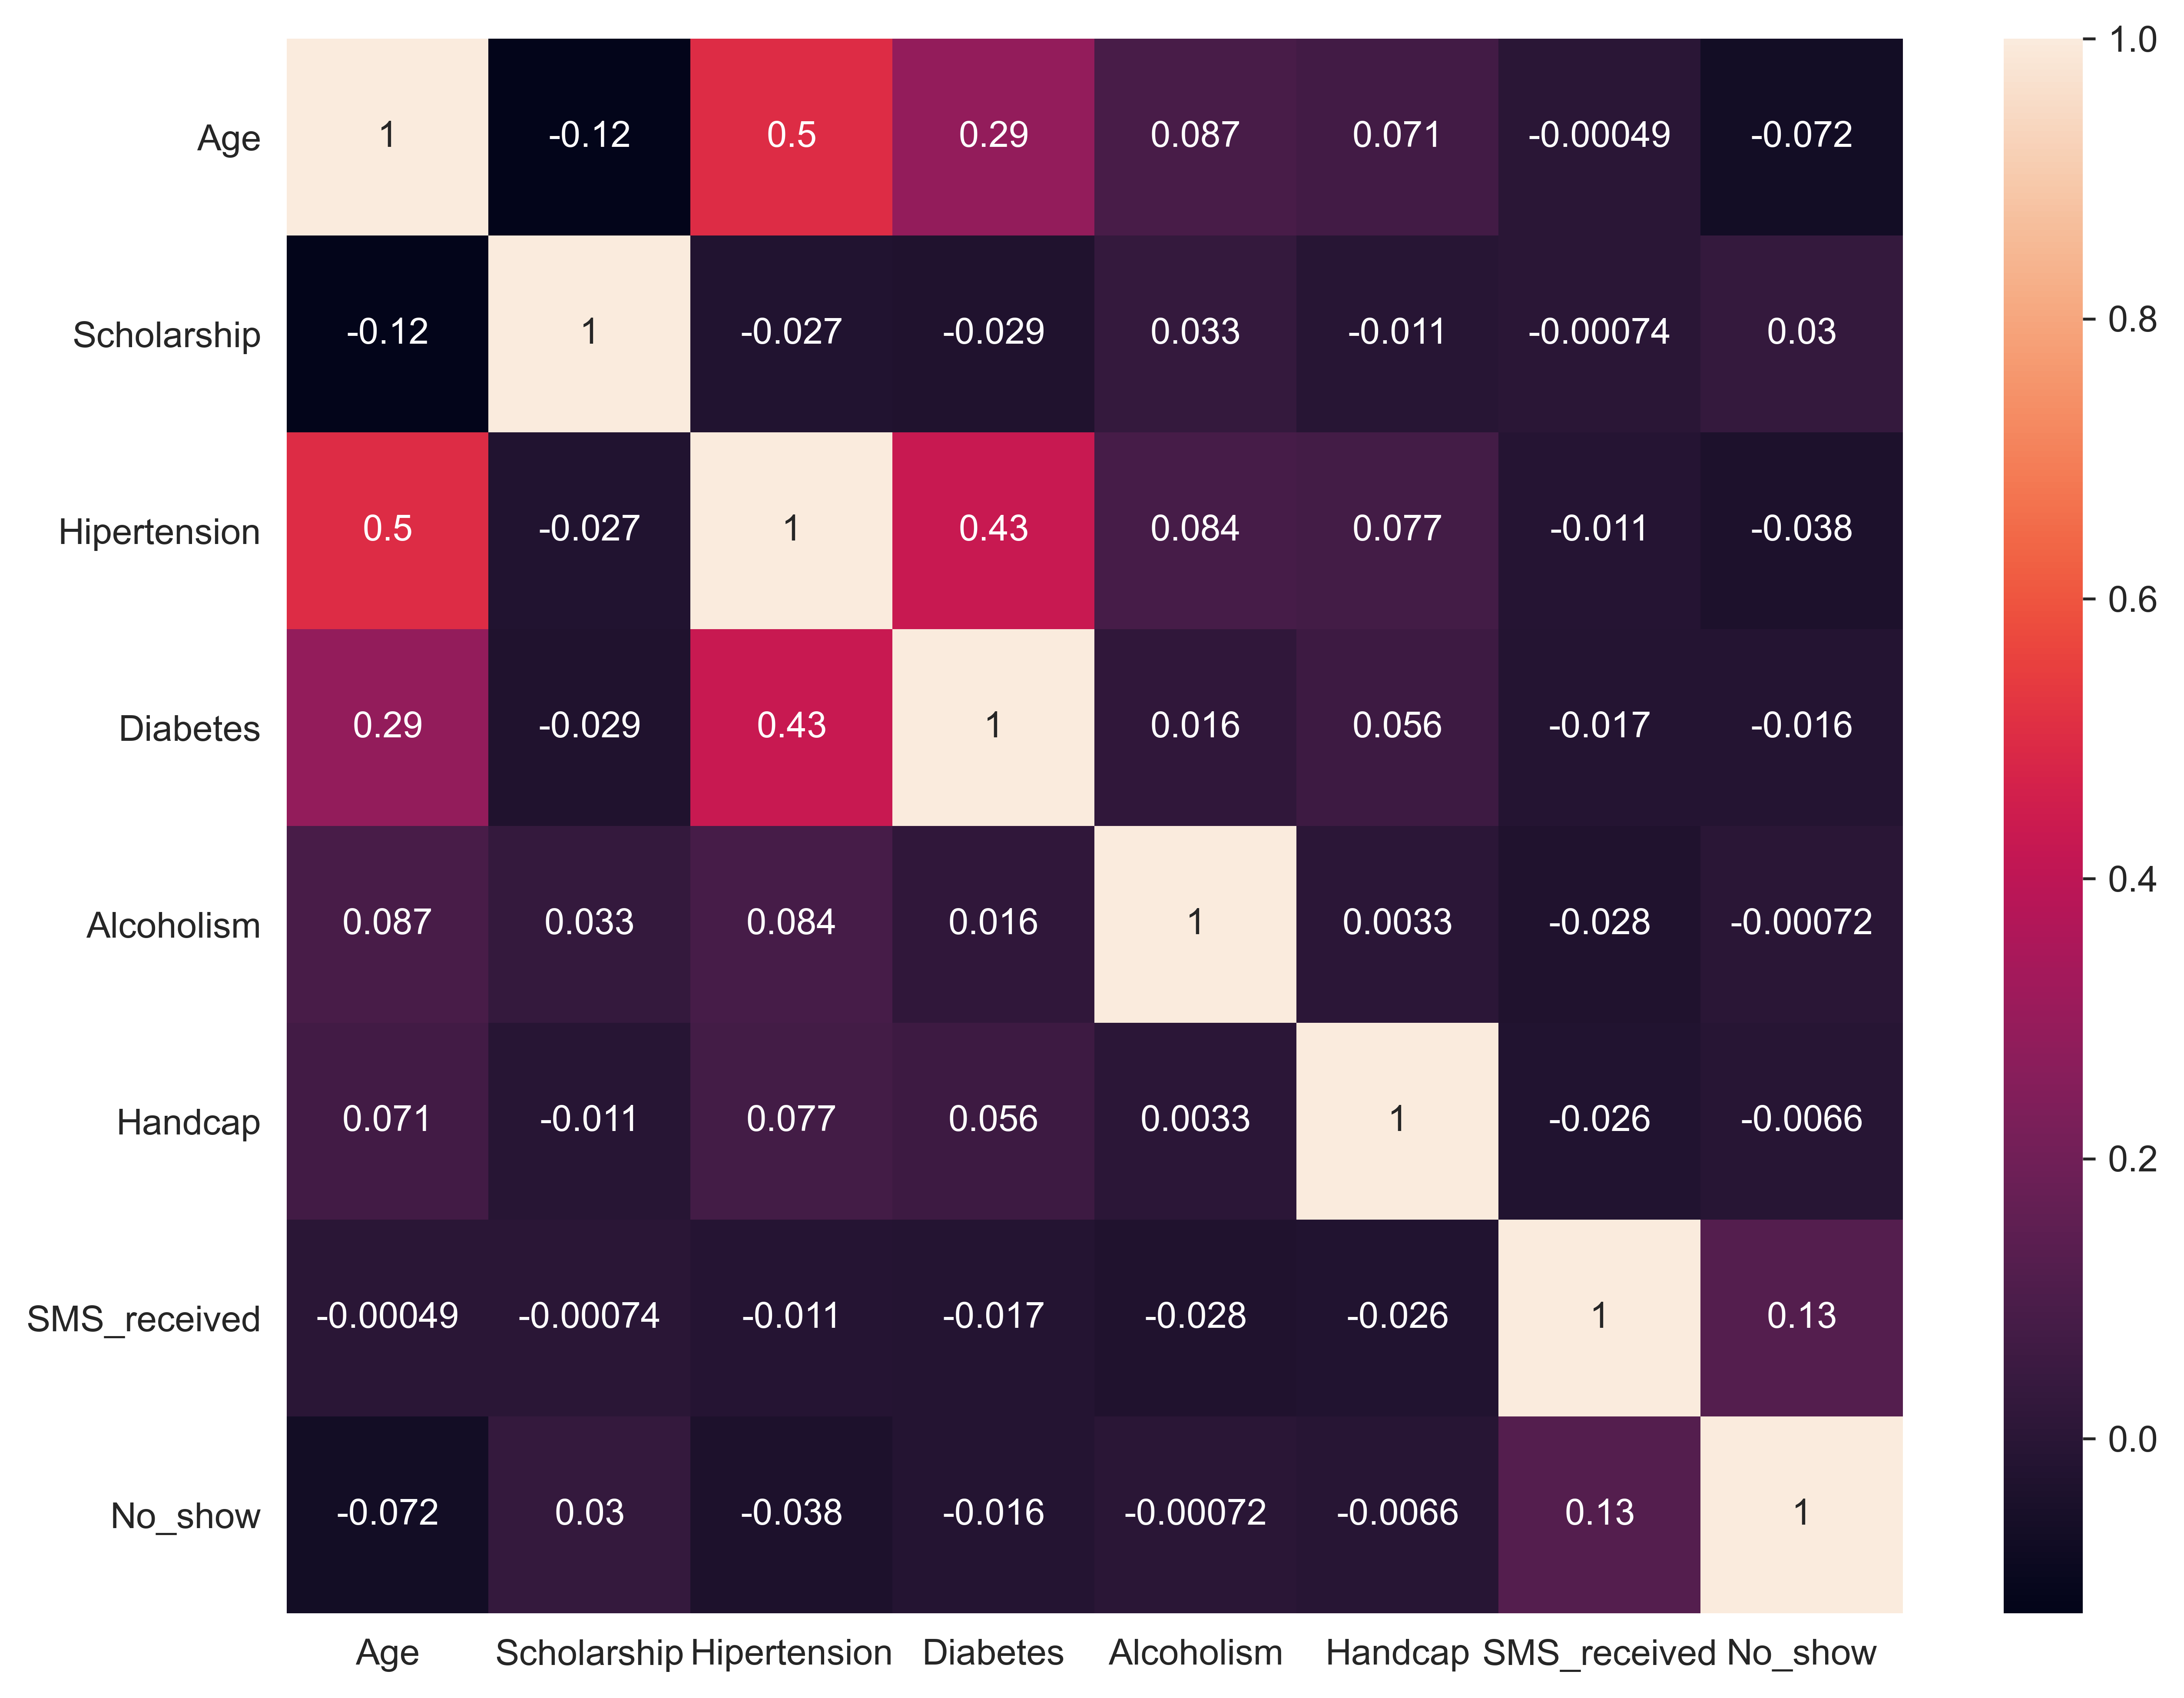

In [96]:
plt.figure(figsize=(10,8), dpi = 600)
sns.heatmap(for_corr.corr(), annot = True)

heatbmap showing the correlation between the qualitative variables.

<a id='conclusions'></a>
## Conclusions

In summary it indicates that out of 21,264 patients who did not show up for medical appointment 18,706 patients which is 87.97% of the who failed appointment did not enrol in the Bolsa Familia social welfare program, this is a significant determinat as to the decision of showing up for a medical appointment. This is a critical factor we should pay attention to. we can deduce from the above that out of 69,030 female patients, 14,073 did not show up for medical appointments which is 20.38% of the female patients, while 7,192 male patients out of 35,684 males patients did not show up which is 20.15% of the male patients. It can be argued that the percentage of male patients missing or not showing up for medical appointment among the male patients is about the same as that of female patients, in this case they are both 20%. Among the patient that did not make a medical appointment 33.82% are male while 66.18% are female, those patient that received an SMS as a reminder 30.95% are male while 69.05% are female.

Also the study revealed further that a reminder in form of SMS does not have a significant impact on decision of patient to keep up to a medical appointment. Out of 10,727 who had schorlarship 2,559 did not show up for appointment which is 23.85% of those who had scholarship, this is not really significant considering the number of patients who did not have scholarship and still turn up massively for medical appointment. While the percentage of female patients in the observation stands at 65.92% that of male stands at 34.08%, The mean age of those who did not show up for appointment is 35.99. It can be affirmed that patients with hypertension may likely miss a medical appointment, as hipertension had the highest pecentage of patients that missed an appointment compared to other category of ailment that missed a medical appointment.

This study is tentative and as such may be further investigated to find more, pattern, trends and insights, the study can be improved on and modelled using machine learning algorithms to predict patients that are likely to miss a medical appointment.
